### 1. 목표
- 보스턴에 있는 주택들의 데이터를 바탕으로 집 가격을 예측해보기

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

### 데이터수집

In [13]:
import warnings #데이터불러올때 warning 안보이게
warnings.filterwarnings('ignore', category=FutureWarning)

In [14]:
boston = load_boston() #딕셔너리형태로 구성되어있음

In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
boston.keys() #학습데이터, 정답(결과), 컬럼명, 설명, 파일네임, 모듈

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [17]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [18]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 3. 데이터 전처리

### 4. 탐색적 데이터분석(EDA)

In [19]:
x = pd.DataFrame(boston['data'], columns = boston['feature_names']) #학습데이터 데이터프레임 형태로
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
y = pd.DataFrame(boston['target'],columns=['price']) #target이 정답값(주택가격)
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [22]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0) #데이터 나누기

In [25]:
# x,y 학습데이터의 갯수가 같은지 확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


### 5. 모델 생성

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #평균제곱오차

In [27]:
lr = LinearRegression() #모델 불러오기

In [28]:
lr.fit(x_train, y_train) #모델 학습

LinearRegression()

In [29]:
#모델의 가중치 확인(coef_) - 각 컬럼별로 가중치
lr.coef_

array([[-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,
         2.34080361e+00, -1.61236043e+01,  3.70870901e+00,
        -3.12108178e-03, -1.38639737e+00,  2.44178327e-01,
        -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
        -4.92792725e-01]])

In [30]:
#편향값 확인
lr.intercept_ 

array([38.09169493])

### 모델 평가

In [31]:
train = lr.predict(x_train) #train데이터로 예측
test = lr.predict(x_test)

In [32]:
train_score = mean_squared_error(train, y_train) #예측값이랑 정답값 넣고 MSE 확인
test_score = mean_squared_error(test, y_test)

In [33]:
#mse
print(train_score)
print(test_score)

19.326470203585725
33.44897999767653


In [34]:
#rmse
print('rmse:', train_score**0.5)
print('rmse:', test_score**0.5)

rmse: 4.396188144698282
rmse: 5.783509315085135


In [35]:
#둘의 오차
print(train_score**0.5 -test_score**0.5)

-1.387321170386853


In [36]:
#r^2 비율확인
lr.score(x_train, y_train)

0.7730135569264234

In [37]:
lr.score(x_test, y_test)

0.5892223849182507

### 선형회귀 모델 특성확장
- 선형회귀는 특성이 적으면 다른 알고리즘에 비해 성능이 낮게 나오기 때문에 특성확장을 사용해서 모델의 복잡도를 증가
- 각 컬럼들의 데이터를 곱해서 새로운 특성으로 확장을 시킴

In [38]:
extended_x_train = x_train.copy()

In [39]:
extended_x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [40]:
# extended_x_train의 각 컬럼들을 서로 한번씩 곱해서 새로운 컬럼 추가
for col1 in x_train.columns : #13번 반복(컬럼 13개)
    for col2 in x_train.columns : #13번 반복 더 해야 169개 + 13개
        extended_x_train[col1 + 'x' + col2] = x_train[col1] * x_train[col2]
        

C:\Users\user\AppData\Local\Temp\ipykernel_5116\1057071582.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_train[col1 + 'x' + col2] = x_train[col1] * x_train[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_5116\1057071582.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_train[col1 + 'x' + col2] = x_train[col1] * x_train[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_5116\1057071582.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [41]:
extended_x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,...,9.71,4.92297,67.49421,859.335,27.787107,77.68,2980.97,168.954,3803.4070,94.2841
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,...,0.00,4.08044,58.89468,172.900,52.238524,39.52,3013.40,189.696,3724.1672,97.6144
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,...,0.00,4.87064,78.48786,617.934,72.104818,68.28,3414.00,188.908,4452.4250,129.5044
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,...,0.00,6.51332,74.72916,827.838,69.117015,62.15,3865.73,188.936,4917.3080,154.5049
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,...,0.00,18.08856,141.29856,2373.624,43.889400,639.36,17742.24,538.128,3392.8704,709.6896


In [42]:
pd.set_option('display.max_columns', None) #모든컬럼 확인하기

In [43]:
extended_x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIMxCRIM,CRIMxZN,CRIMxINDUS,CRIMxCHAS,CRIMxNOX,CRIMxRM,CRIMxAGE,CRIMxDIS,CRIMxRAD,CRIMxTAX,CRIMxPTRATIO,CRIMxB,CRIMxLSTAT,ZNxCRIM,ZNxZN,ZNxINDUS,ZNxCHAS,ZNxNOX,ZNxRM,ZNxAGE,ZNxDIS,ZNxRAD,ZNxTAX,ZNxPTRATIO,ZNxB,ZNxLSTAT,INDUSxCRIM,INDUSxZN,INDUSxINDUS,INDUSxCHAS,INDUSxNOX,INDUSxRM,INDUSxAGE,INDUSxDIS,INDUSxRAD,INDUSxTAX,INDUSxPTRATIO,INDUSxB,INDUSxLSTAT,CHASxCRIM,CHASxZN,CHASxINDUS,CHASxCHAS,CHASxNOX,CHASxRM,CHASxAGE,CHASxDIS,CHASxRAD,CHASxTAX,CHASxPTRATIO,CHASxB,CHASxLSTAT,NOXxCRIM,NOXxZN,NOXxINDUS,NOXxCHAS,NOXxNOX,NOXxRM,NOXxAGE,NOXxDIS,NOXxRAD,NOXxTAX,NOXxPTRATIO,NOXxB,NOXxLSTAT,RMxCRIM,RMxZN,RMxINDUS,RMxCHAS,RMxNOX,RMxRM,RMxAGE,RMxDIS,RMxRAD,RMxTAX,RMxPTRATIO,RMxB,RMxLSTAT,AGExCRIM,AGExZN,AGExINDUS,AGExCHAS,AGExNOX,AGExRM,AGExAGE,AGExDIS,AGExRAD,AGExTAX,AGExPTRATIO,AGExB,AGExLSTAT,DISxCRIM,DISxZN,DISxINDUS,DISxCHAS,DISxNOX,DISxRM,DISxAGE,DISxDIS,DISxRAD,DISxTAX,DISxPTRATIO,DISxB,DISxLSTAT,RADxCRIM,RADxZN,RADxINDUS,RADxCHAS,RADxNOX,RADxRM,RADxAGE,RADxDIS,RADxRAD,RADxTAX,RADxPTRATIO,RADxB,RADxLSTAT,TAXxCRIM,TAXxZN,TAXxINDUS,TAXxCHAS,TAXxNOX,TAXxRM,TAXxAGE,TAXxDIS,TAXxRAD,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxCRIM,PTRATIOxZN,PTRATIOxINDUS,PTRATIOxCHAS,PTRATIOxNOX,PTRATIOxRM,PTRATIOxAGE,PTRATIOxDIS,PTRATIOxRAD,PTRATIOxTAX,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxCRIM,BxZN,BxINDUS,BxCHAS,BxNOX,BxRM,BxAGE,BxDIS,BxRAD,BxTAX,BxPTRATIO,BxB,BxLSTAT,LSTATxCRIM,LSTATxZN,LSTATxINDUS,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,0.128228,0.000000,2.220158,0.35809,0.181552,2.489084,31.690965,1.024746,2.86472,109.93363,6.230766,140.263853,3.477054,0.000000,0.00,0.000,0.0,0.00,0.00,0.0,0.00000,0.0,0.0,0.0,0.0,0.000,2.220158,0.000,38.4400,6.2,3.14340,43.09620,548.700,17.742540,49.60,1903.40,107.880,2428.5400,60.2020,0.35809,0.0,6.2,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.7,9.71,0.181552,0.00,3.14340,0.507,0.257049,3.524157,44.8695,1.450882,4.056,155.649,8.8218,198.59190,4.92297,2.489084,0.00,43.09620,6.951,3.524157,48.316401,615.1635,19.891677,55.608,2133.957,120.9474,2722.70670,67.49421,31.690965,0.0,548.700,88.5,44.8695,615.1635,7832.25,253.26045,708.0,27169.5,1539.90,34665.450,859.335,1.024746,0.00000,17.742540,2.8617,1.450882,19.891677,253.26045,8.189327,22.8936,878.5419,49.79358,1120.927890,27.787107,2.86472,0.0,49.60,8.0,4.056,55.608,708.0,22.8936,64.0,2456.0,139.2,3133.60,77.68,109.93363,0.0,1903.40,307.0,155.649,2133.957,27169.5,878.5419,2456.0,94249.0,5341.8,120251.90,2980.97,6.230766,0.0,107.880,17.4,8.8218,120.9474,1539.90,49.79358,139.2,5341.8,302.76,6815.580,168.954,140.263853,0.0,2428.5400,391.7,198.59190,2722.70670,34665.450,1120.927890,3133.60,120251.90,6815.580,153428.8900,3803.4070,3.477054,0.000,60.2020,9.71,4.92297,67.49421,859.335,27.787107,77.68,2980.97,168.954,3803.4070,94.2841
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,0.025205,0.000000,1.716196,0.00000,0.065568,0.946368,2.778300,0.839412,0.63504,48.42180,3.048192,59.842994,1.568549,0.000000,0.00,0.000,0.0,0.00,0.00,0.0,0.00000,0.0,0.0,0.0,0.0,0.000,1.716196,0.000,116.8561,0.0,4.46453,64.43841,189.175,57.155713,43.24,3297.05,207.552,4074.7214,106.8028,0.00000,0.0,0.0,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.0,0.00,0.065568,0.00,4.46453,0.000,0.170569,2.461893,7.2275,2.183655,1.652,125.965,7.9296,155.67622,4.08044,0.946368,0.00,64.43841,0.000,2.461893,35.533521,104.3175,31.517595,23.844,1818.105,114.4512,2246.93934,58.89468,2.778300,0.0,189.175,0.0,7.2275,104.3175,306.25,92.52775,70.0,5337.5,336.00,6596.450,172.900,0.839412,0.00000,57.155713,0.0000,2.183655,31.517595,92.52775,27.955541,21.1492,1612.6265,101.51616,1992.994862,52.238524,0.63504,0.0,43.24,0.0,1.652,23.844,70.0,21.1492,16.0,1220.0,76.8,1507.76,39.52,48.42180,0.0,3297.05,0.0,125.965,1818.105,5337.5,1612.6265,1220.0,93025.0,5856.0,114966.70,3013.40,3.048192,0.0,207.552,0.

In [44]:
extended_x_train.shape

(404, 182)

### 특성확장된 train 데이터의 값과 정답으로 모델학습

In [45]:
lr2 = LinearRegression().fit(extended_x_train, y_train)

In [46]:
extended_x_test = x_test.copy()

In [47]:
for col1 in x_train.columns : #13번 반복(컬럼 13개)
    for col2 in x_train.columns : #13번 반복 더 해야 169개
        extended_x_test[col1 + 'x' + col2] = x_test[col1] * x_test[col2]

C:\Users\user\AppData\Local\Temp\ipykernel_5116\2255345048.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_test[col1 + 'x' + col2] = x_test[col1] * x_test[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_5116\2255345048.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_test[col1 + 'x' + col2] = x_test[col1] * x_test[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_5116\2255345048.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [48]:
extended_x_test.shape

(102, 182)

In [49]:
extended_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 329 to 108
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 145.8 KB


### 오차 = 예측값 - 정답

In [50]:
ex_pre_train = lr2.predict(extended_x_train)
ex_pre_test = lr2.predict(extended_x_test)

In [51]:
ex_train_mse = mean_squared_error(ex_pre_train, y_train)

In [52]:
ex_test_mse = mean_squared_error(ex_pre_test,y_test)

In [53]:
print('train mse:', ex_train_mse)
print('test mse:', ex_test_mse)
print('train, test mse의 차이:', ex_train_mse - ex_test_mse)
print('train, test rmse의 차이:',ex_train_mse**0.5 - ex_test_mse**0.5)

train mse: 4.340278052012249
test mse: 31.277814972583755
train, test mse의 차이: -26.937536920571507
train, test rmse의 차이: -3.509323838030567


In [54]:
#r^2
lr2.score(extended_x_train, y_train)
lr2.score(extended_x_test, y_test)

0.6158858583939284

In [55]:
# 훈련데이터의 설명력이 높으니 과대적합의 가능성이 있겠다!
# --> 규제(랏쏘, 릿지)

### Lasso

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso = Lasso(alpha = 10).fit(extended_x_train, y_train) #규제의 강도(높을수록 과대적합 줄어듦)

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.194e+03, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(


In [58]:
print('사용한 특성의 수:', np.sum(lasso.coef_ != 0)) #가중치가 0이 아닌 값 추출해서 더해라

사용한 특성의 수: 46


In [59]:
pre_train_lasso = lasso.predict(extended_x_train)
pre_test_lasso = lasso.predict(extended_x_test)

In [61]:
#오차확인
lasso_train_mse = mean_squared_error(pre_train_lasso, y_train)
lasso_test_mse = mean_squared_error(pre_test_lasso, y_test)

In [67]:
print('train mse:',lasso_train_mse)
print('test mse:',lasso_test_mse)
print('train, test 차이:', lasso_train_mse - lasso_test_mse)

train mse: 9.825814145224081
test mse: 26.404674056715386
train, test 차이: -16.578859911491307


In [70]:
print('train rmse:', lasso_train_mse**0.5)
print('test rmse:', lasso_test_mse**0.5)
print('train, test rmse 차이:', lasso_train_mse**0.5 - lasso_test_mse**0.5)

train rmse: 3.1346154700734954
test rmse: 5.138547854862829
train, test rmse 차이: -2.003932384789334


In [71]:
lasso.score(extended_x_train, y_train) #모델이 만든 직선이 train데이터를 88% 설명

0.8845973124097618

In [72]:
lasso.score(extended_x_test, y_test) #훈련데이터 설명력만 높으니 과대적합 가능성 있음

0.6757315458712968

### 릿지

In [73]:
from sklearn.linear_model import Ridge

In [74]:
ridge = Ridge(alpha=10).fit(extended_x_train, y_train)

In [75]:
print('사용한 특성의 수:',np.sum(ridge.coef_ != 0))

사용한 특성의 수: 182


In [76]:
pre_train_ridge = ridge.predict(extended_x_train)
pre_test_ridge = ridge.predict(extended_x_test)

In [78]:
ridge_train_mse = mean_squared_error(pre_train_ridge, y_train)
ridge_test_mse = mean_squared_error(pre_test_ridge, y_test)

In [86]:
print('train mse:', ridge_train_mse)
print('test mse:', ridge_test_mse)
print('train, test mse 차이:',ridge_train_mse - ridge_test_mse)

print('train rmse:', ridge_train_mse ** 0.5)
print('test rmse:', ridge_test_mse**0.5)
print('train, test rmse 차이:', ridge_train_mse**0.5 - ridge_test_mse**0.5)

train mse: 5.09456324639931
test mse: 26.79259651669547
train, test mse 차이: -21.698033270296158
train rmse: 2.25711391967692
test rmse: 5.176156539044725
train, test rmse 차이: -2.919042619367805


In [87]:
ridge.score(extended_x_train, y_train) # train 데이터에 대해서 릿지모델이 94% 설명력

0.9401651321668143

In [88]:
ridge.score(extended_x_test, y_test) 

0.6709675780923591

In [ ]:
# 같은 알파값일때 ridge보다는 lasso에서 과대적합을 더 잘 해소

### 하이퍼파라미터 튜닝
- alpha 값을 바꿔가면서 rmse 확인

#### 랏쏘

In [90]:
alpha_list = [0.001,0.01,0.1,1,10,100,1000]
lasso_train_list = [] #train 데이터의 rmse값을 담아줄 빈 리스트
lasso_test_list = [] #test데이터 rmse

In [92]:
for i in alpha_list:
    lasso = Lasso(alpha = i)
    lasso.fit(extended_x_train, y_train)
    
    # train 데이터 예측
    train_pred = lasso.predict(extended_x_train)
    lasso_train_rmse = mean_squared_error(train_pred, y_train)**0.5
    lasso_train_list.append(lasso_train_rmse)
    
    # test 데이터도 똑같이
    test_pred = lasso.predict(extended_x_test)
    lasso_test_rmse = mean_squared_error(test_pred, y_test)**0.5
    lasso_test_list.append(lasso_test_rmse)

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+03, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+03, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [93]:
lasso_train_list

[2.2758518221817816,
 2.332152582439725,
 2.556464318296377,
 2.8421497511641136,
 3.1346154700734954,
 3.9961466355356023,
 5.353949685680336]

In [94]:
lasso_test_list

[5.795351938140569,
 5.447613887368501,
 4.676403047411522,
 5.053153764089218,
 5.138547854862829,
 5.737963242918281,
 6.985827230756549]

In [97]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

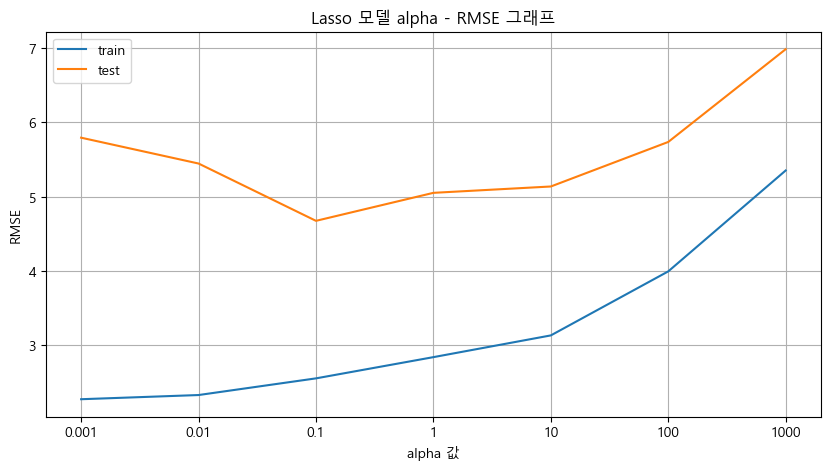

In [99]:
plt.figure(figsize=(10,5))
plt.plot(lasso_train_list, label='train')
plt.plot(lasso_test_list, label='test')
plt.title('Lasso 모델 alpha - RMSE 그래프')
plt.xlabel('alpha 값')
plt.xticks(np.arange(7), alpha_list) #x축 범위 설정(x축 값의 개수, 나타낼 값), xticks없으면 배열넘버로 표기
plt.ylabel('RMSE')
plt.legend() #범례(왼쪽옆에 색상표시)
plt.grid()
plt.show()

#### 릿지

In [110]:
alpha_list2 = [0.001,0.01,0.1,1,10,100,1000]
ridge_train_list = []
ridge_test_list = []

In [111]:
for i in alpha_list2:
    ridge = Ridge(alpha=i).fit(extended_x_train, y_train)
    
    #train 예측
    train_pred = ridge.predict(extended_x_train) #학습시킨 ridge로 예측해봐
    ridge_train_rmse = mean_squared_error(train_pred, y_train)**0.5
    ridge_train_list.append(ridge_train_rmse)
    
    test_pred = ridge.predict(extended_x_test) #예측값 얻어야
    ridge_test_rmse = mean_squared_error(test_pred, y_test)**0.5
    ridge_test_list.append(ridge_test_rmse)

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.05867e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [118]:
print('Ridge 모델 train, test rmse 차이:', ridge_train_rmse - ridge_test_rmse)
print('Lasso 모델 train, test rmse 차이:', lasso_train_rmse - lasso_test_rmse)

ridge 모델 train, test rmse 차이: -2.2821610893355504
Lasso 모델 train, test rmse 차이: -1.6318775450762137


In [112]:
ridge_train_list

[2.0835065507717947,
 2.0850764409779257,
 2.0994432636573346,
 2.1580820650757446,
 2.25711391967692,
 2.4260271435858827,
 2.599646390917805]

In [113]:
ridge_test_list

[5.653502668471952,
 5.874871100553151,
 6.0103239800468335,
 5.783909816750169,
 5.176156539044725,
 4.765046455866838,
 4.8818074802533555]

In [114]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family="Malgun Gothic") #한글인코딩
plt.rcParams['axes.unicode_minus'] = False

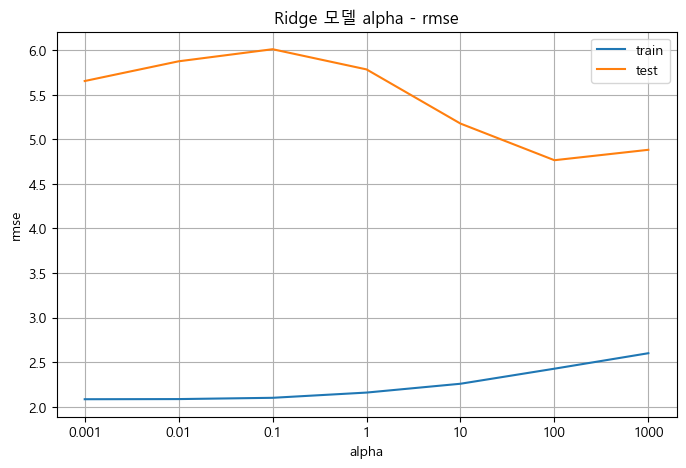

In [119]:
plt.figure(figsize=(8,5))
plt.plot(ridge_train_list, label='train')
plt.plot(ridge_test_list, label='test')
plt.title('Ridge 모델 alpha - rmse')
plt.xlabel('alpha')
plt.xticks(np.arange(7), alpha_list)
plt.ylabel('rmse')
plt.legend()
plt.grid()
plt.show()